# JPMorgan Chase & Co. Quantitative Research Job Simulation
## Task 4

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Exploration

In [9]:
# Configure plot style
plt.style.use('dark_background')

# Load the data
df = pd.read_csv(r'C:\Users\Babanz\VS\quant\JPMC-Forage\Data\Loan_Data.csv')

# We only need the fico score and defaults
df = df[['fico_score', 'default']]

### Histogram

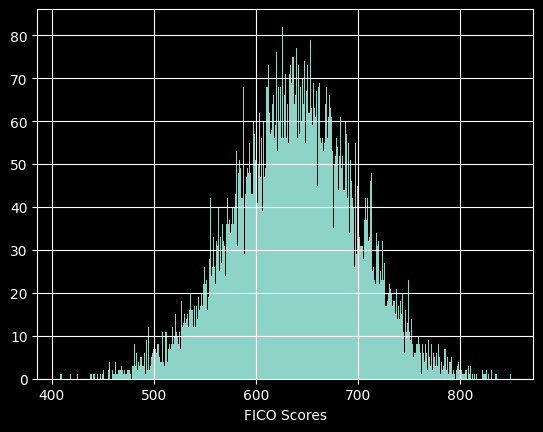

In [12]:
# Create the histogram
fico_range = df['fico_score'].max() - df['fico_score'].min()
df['fico_score'].hist(bins=fico_range)
plt.xlabel('FICO Scores')
plt.show()

## Log-likelihood

In [47]:
def compute_log_likelihood(ni, ki):
    """Compute the log-likelihood for a single bucket."""
    if ni == 0 or ki == 0 or ki == ni:
        return 0  # Avoid log(0) or undefined probabilities

    pi = ki / ni
    return ki * np.log(pi) + (ni - ki) * np.log(1 - pi)

def total_log_likelihood(buckets, fico_scores, default_labels):
    """Compute total log-likelihood across all buckets."""
    total_ll = 0
    for (start, end) in buckets:
        mask = (fico_scores >= start) & (fico_scores < end)
        ni = mask.sum()
        ki = default_labels[mask].sum()
        total_ll += compute_log_likelihood(ni, ki)
    return total_ll

def find_optimal_fico_buckets(fico_scores, default_labels, n_buckets=5):
    """
    Find bucket boundaries to maximize log-likelihood.
    
    Args:
        fico_scores: Array or Series of FICO scores.
        default_labels: Array or Series of default flags (0 or 1).
        n_buckets: Number of buckets to find.

    Returns:
        List of bucket boundary tuples.
    """
    fico_sorted = np.sort(fico_scores)
    boundaries = np.linspace(fico_sorted.min(), fico_sorted.max(), n_buckets + 1).astype(int)

    # Define the buckets from boundaries
    buckets = [(boundaries[i], boundaries[i + 1]) for i in range(n_buckets)]
    
    # Optionally: fine-tune boundaries here with greedy or grid search

    # Compute total log-likelihood
    log_likelihood = total_log_likelihood(buckets, fico_scores, default_labels)

    return buckets, log_likelihood

# Run log-likelihood bucketing
buckets, ll = find_optimal_fico_buckets(df['fico_score'], df['default'], n_buckets=8)

print("Optimal FICO Buckets:")
for i, (low, high) in enumerate(buckets, 1):
    print(f"Bucket {i}: {low}-{high}")

print(f"\nTotal Log-Likelihood: {ll:.2f}")

Optimal FICO Buckets:
Bucket 1: 408-463
Bucket 2: 463-518
Bucket 3: 518-573
Bucket 4: 573-629
Bucket 5: 629-684
Bucket 6: 684-739
Bucket 7: 739-794
Bucket 8: 794-850

Total Log-Likelihood: -4282.57


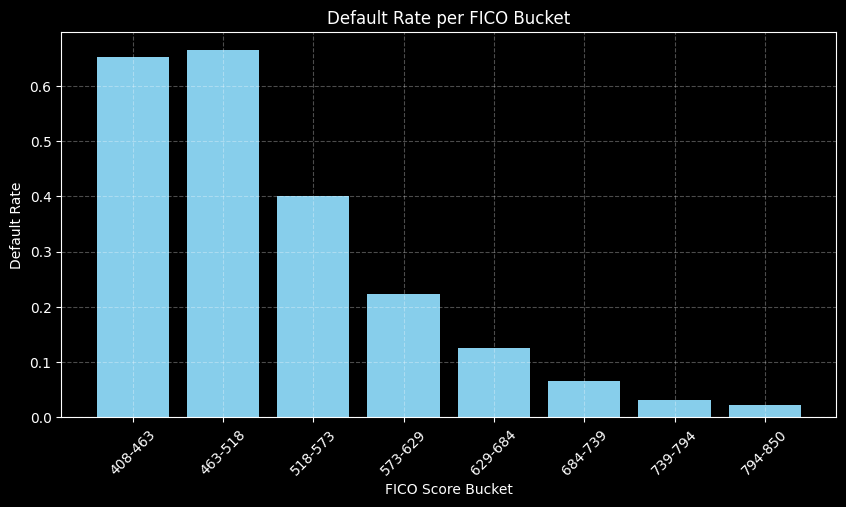

In [48]:
bucket_labels = []
default_rates = []

for i, (low, high) in enumerate(buckets):
    mask = (df['fico_score'] >= low) & (df['fico_score'] < high)
    rate = df.loc[mask, 'default'].mean()
    default_rates.append(rate)
    bucket_labels.append(f'{low}-{high}')

plt.figure(figsize=(10, 5))
plt.bar(bucket_labels, default_rates, color='skyblue')
plt.title('Default Rate per FICO Bucket')
plt.ylabel('Default Rate')
plt.xlabel('FICO Score Bucket')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()